 # Desafío - Naive Bayes 

###  Ejercicio 1: Preparar el ambiente de trabajo 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
files = glob.glob(os.getcwd()+"/dump/*.csv")

In [3]:
files

['/home/seba/Documentos/Desafio latam/Machine Learning/3_Bayes ingenuo/dump/de_la_soul_scrape.csv',
 '/home/seba/Documentos/Desafio latam/Machine Learning/3_Bayes ingenuo/dump/kiss_scrape.csv',
 '/home/seba/Documentos/Desafio latam/Machine Learning/3_Bayes ingenuo/dump/the_doors_scrape.csv',
 '/home/seba/Documentos/Desafio latam/Machine Learning/3_Bayes ingenuo/dump/bob_dylan_scrape.csv',
 '/home/seba/Documentos/Desafio latam/Machine Learning/3_Bayes ingenuo/dump/britney_spears_scrape.csv',
 '/home/seba/Documentos/Desafio latam/Machine Learning/3_Bayes ingenuo/dump/dua_lipa_scrape.csv',
 '/home/seba/Documentos/Desafio latam/Machine Learning/3_Bayes ingenuo/dump/metallica_scrape.csv',
 '/home/seba/Documentos/Desafio latam/Machine Learning/3_Bayes ingenuo/dump/vital_remains_scrape.csv',
 '/home/seba/Documentos/Desafio latam/Machine Learning/3_Bayes ingenuo/dump/the_smiths_scrape.csv',
 '/home/seba/Documentos/Desafio latam/Machine Learning/3_Bayes ingenuo/dump/iron_maiden_scrape.csv',
 '/

In [4]:
df = pd.concat(map(pd.read_csv, files), ignore_index=True).drop(['Unnamed: 0'], axis=1)

In [5]:
df

,0,1,2,3
0,De La Soul,hiphop,Jenifa Taught Me (Derwin's Revenge),DOVE: \n Access to her code \n Lovestruck was ...
1,De La Soul,hiphop,Potholes In My Lawn,"(Yo, something's wrong here. No, not again!) \..."
2,De La Soul,hiphop,The Magic Number,POS \n 3 \n That's the Magic Number \n Yes it ...
3,De La Soul,hiphop,Change In Speak,POS: \n Once again it's time to bite more soul...
4,De La Soul,hiphop,Cool Breeze On The Rocks,Cool breeze \n Rock that shit homie \n Rock \n...
...,...,...,...,...
9484,Nickelback,rock,Never Too Late,This world will never be what I expected \n An...
9485,Nickelback,rock,Remind Me,Never made it as a wise man \n I couldn't cut ...
9486,Nickelback,rock,Sick And Tired,I'm Feeling \n This tension inside of me \n Pr...
9487,Nickelback,rock,Take It All,Are you serious do you believe in this? Destro...


### Ejercicio 2: Descripción de los datos 

In [6]:
songs_df = df['0'].value_counts()

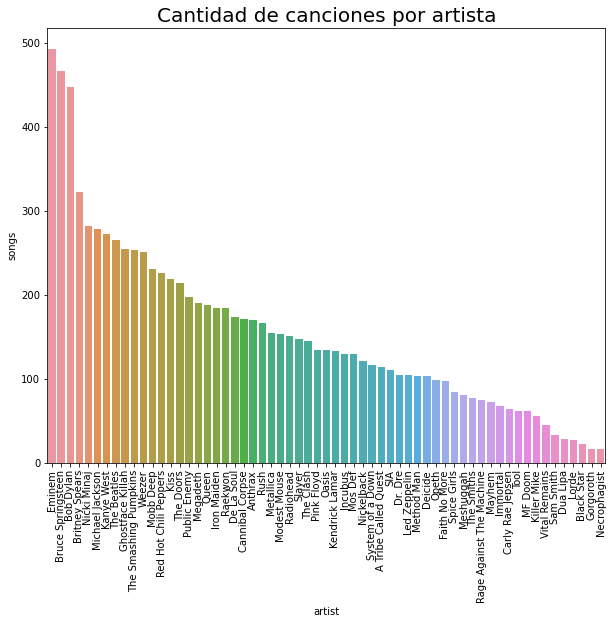

In [7]:
plt.figure(figsize = (10,8))
plt.xticks(rotation=90)
plt.title("Cantidad de canciones por artista", fontdict={"fontsize":20})
sns.barplot(x='artist', y='songs' , data= pd.DataFrame({'artist': songs_df.index, 'songs':songs_df.values}), orient="v")
plt.show()

##### Se observa claramente en el grafico anterior que hay 3 artistas que lideran en cantidad de canciones, estos son Eminem, Bruce Springsteen y Bob Dylan

In [8]:
 style_df = df['1'].value_counts()

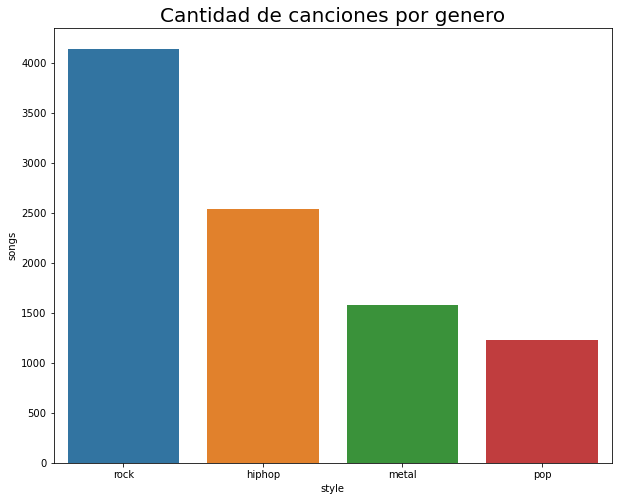

In [9]:
plt.figure(figsize = (10,8))
plt.xticks(rotation=0)
plt.title("Cantidad de canciones por genero", fontdict={"fontsize":20})
sns.barplot(x='style', y='songs' , data= pd.DataFrame({'style': style_df.index, 'songs':style_df.values}))
plt.show()

##### En el grafico anterior se observa que el genero que más canciones tiene es el Rock. 

### Ejercicio 3: Matriz de ocurrencias

##### Lo primero sera extraer las 100 palabras mas repetidas en toda la base de datos

In [10]:
text = df['3']

In [11]:
text

0       DOVE: \n Access to her code \n Lovestruck was ...
1       (Yo, something's wrong here. No, not again!) \...
2       POS \n 3 \n That's the Magic Number \n Yes it ...
3       POS: \n Once again it's time to bite more soul...
4       Cool breeze \n Rock that shit homie \n Rock \n...
                              ...                        
9484    This world will never be what I expected \n An...
9485    Never made it as a wise man \n I couldn't cut ...
9486    I'm Feeling \n This tension inside of me \n Pr...
9487    Are you serious do you believe in this? Destro...
9488    I paid my last respects this morning on an ear...
Name: 3, Length: 9489, dtype: object

In [12]:
filter_lenguaje = ['so','but','no','my','we','is','for','with','don','be','me','that','on',
                                   'your','the','you','to','in','it','of','an', 'and', 'are', 'yet', 'yo','00',
                                   '000','007','01','019','02','0281','03','04','05', '06','07','08','09''10',
                                   '100','1000','1000000x','1001','100k','101','10128','102','103','10304',
                                   '10473','105','106','106th','109','10k','10s','10th','10x','11','110','1100',
                                   '110th','112','11206','all', 'can','when','if','this','he','do','or','ll'
                                   '118','119','11am','11s','11th','12','120','123','125','125th','129','12p',
                                   '12pm','12th','12x','13','130','1345','135','13th','13x','14','140','147',
                                   '14k','14th','15','150','151','1555','15th','16','160','16s','16th','16x',
                                   '17','1747','175','1792','17th','18','180','1800','1801','182','1831','186',
                                   '187','1873','1877','187um','18th','19','at','then','em','ll', 'english']

In [13]:
c_vect=CountVectorizer(max_features=100,stop_words='english')

Con stop_words quito los numeros, las preposiciones, conjunciones y enlaces, ya que no aportan en la busqueda de palabras claves o con significancia.

In [14]:
c_vect_fit = c_vect.fit_transform(text)
words = c_vect.get_feature_names()
words_freq = c_vect_fit.toarray().sum(axis = 0)

In [15]:
key_word=pd.DataFrame({'words': words, 'frequency':words_freq})

In [16]:
key_word.sort_values(by=['frequency'], ascending=False)

,words,frequency
51,like,19629
18,don,17398
44,know,14962
31,got,14171
43,just,13978
...,...,...
15,death,1897
47,left,1895
82,thing,1882
20,end,1829


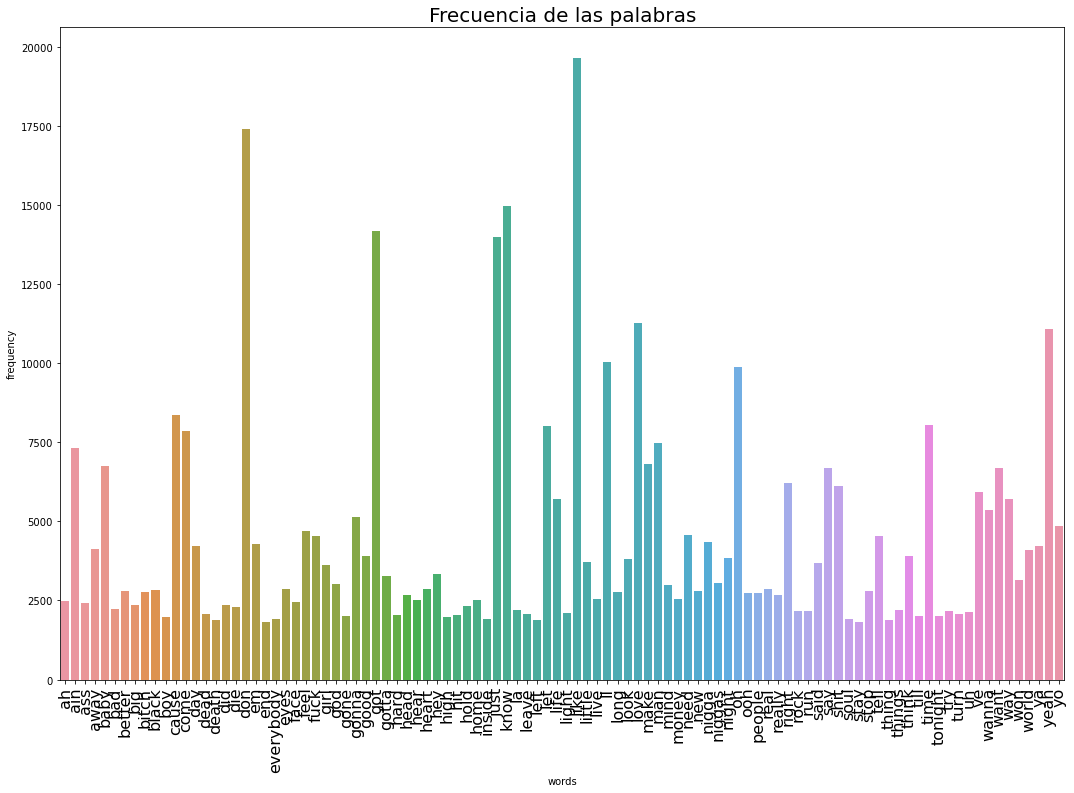

In [17]:
plt.figure(figsize = (18,12))
plt.xticks(rotation=90, fontsize=16)
plt.title("Frecuencia de las palabras", fontdict={"fontsize":20})
sns.barplot(x='words', y='frequency', data=key_word)
plt.show()

##### Ahora extraeré las 100 palabras más repetidas en cada genero.

In [18]:
def extract_words_type_music(data,type_musics):
    text_type_music = data[data['1']==type_musics]['3']
    count_vector=CountVectorizer(max_features=100,stop_words='english')

    count_vector_fit= count_vector.fit_transform(text_type_music)
    word = count_vector.get_feature_names()
    word_frequency = count_vector_fit.toarray().sum(axis = 0)
    keys_word=pd.DataFrame({'words': word, 'frequency':word_frequency, 'type':type_musics}).sort_values(by=['frequency'], 
                                                                                 ascending=False)
    
    return keys_word

##### Las 100 palabras mas repetidas del rock

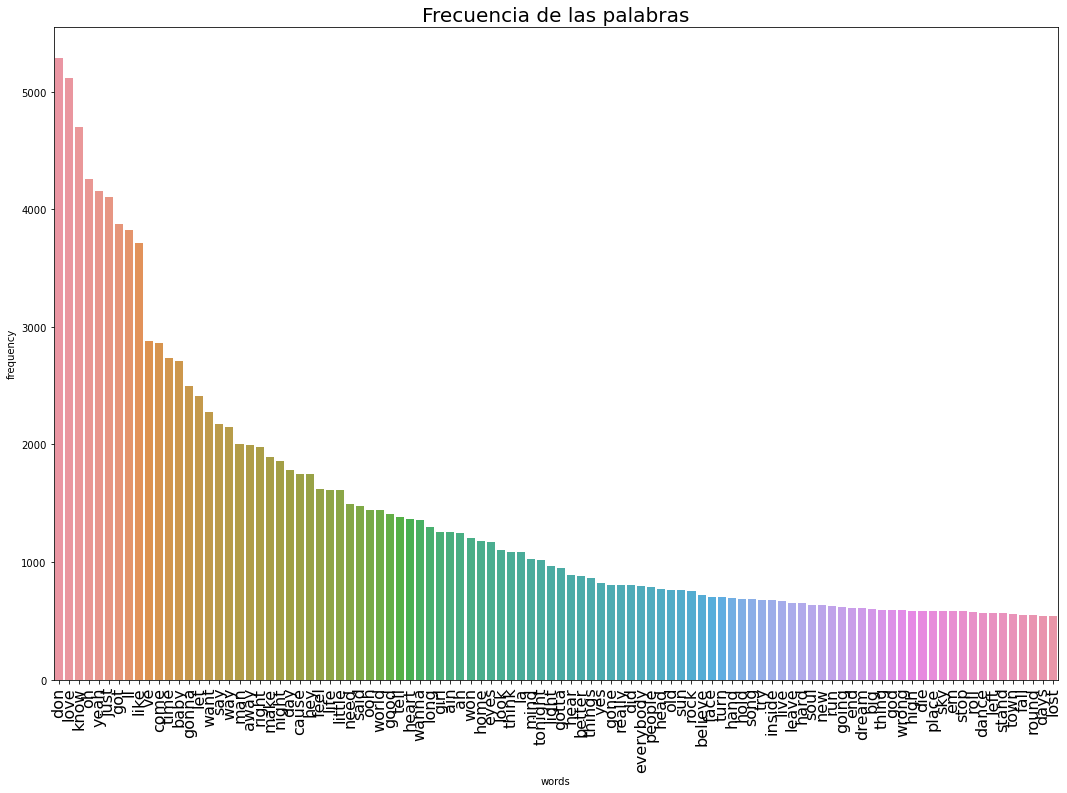

In [19]:
plt.figure(figsize = (18,12))
plt.xticks(rotation=90, fontsize=16)
plt.title("Frecuencia de las palabras", fontdict={"fontsize":20})
sns.barplot(x='words', y='frequency', data=extract_words_type_music(df,'rock'))
plt.show()

##### Las 100 palabras mas repetidas del hiphop

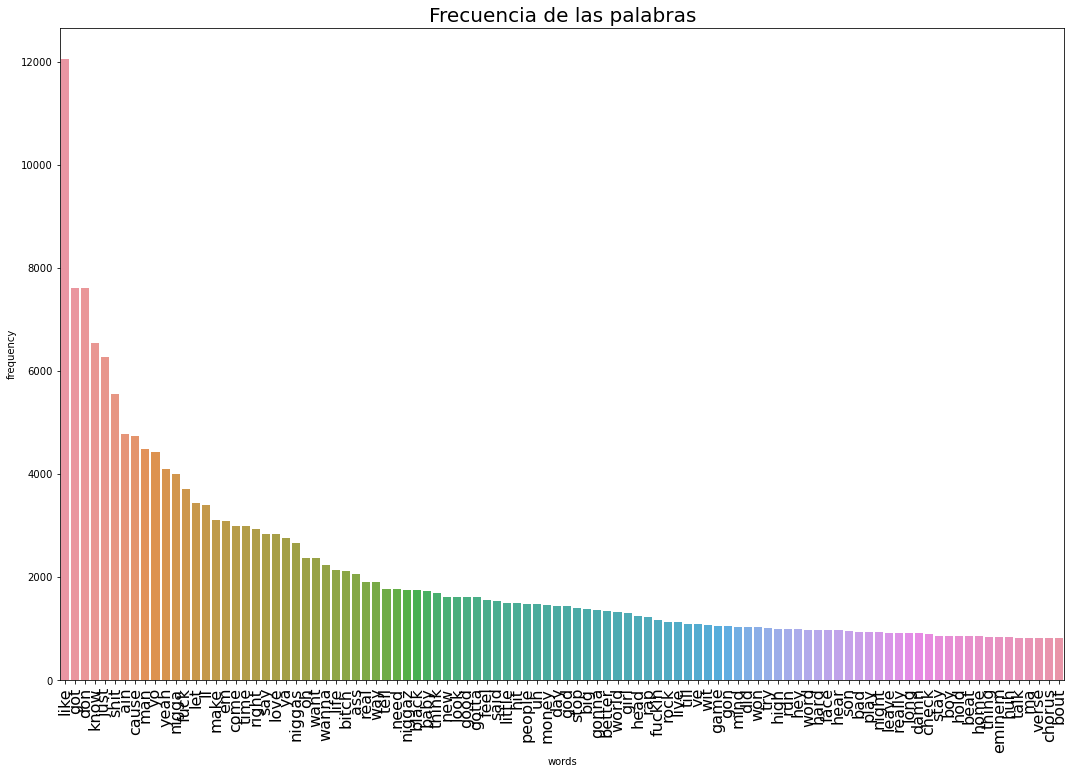

In [20]:
plt.figure(figsize = (18,12))
plt.xticks(rotation=90, fontsize=16)
plt.title("Frecuencia de las palabras", fontdict={"fontsize":20})
sns.barplot(x='words', y='frequency', data=extract_words_type_music(df,'hiphop'))
plt.show()

##### Las 100 palabras mas repetidas del metal

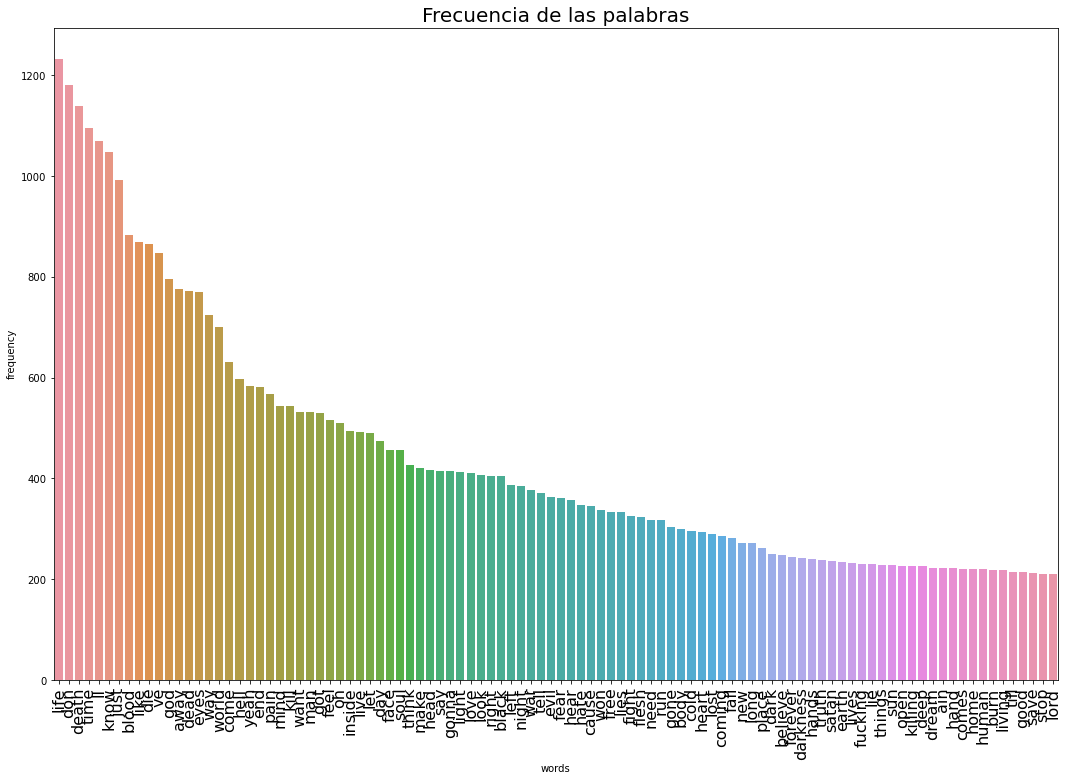

In [21]:
plt.figure(figsize = (18,12))
plt.xticks(rotation=90, fontsize=16)
plt.title("Frecuencia de las palabras", fontdict={"fontsize":20})
sns.barplot(x='words', y='frequency', data=extract_words_type_music(df,'metal'))
plt.show()

##### Las 100 palabras mas repetidas del pop

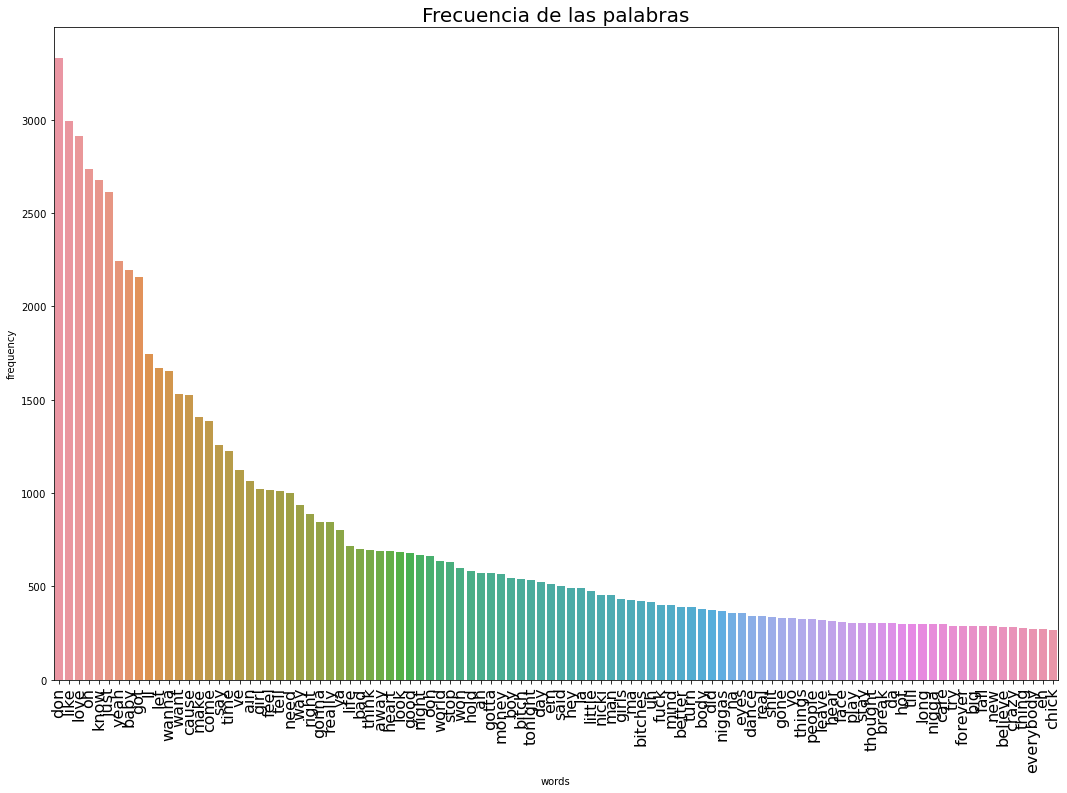

In [22]:
plt.figure(figsize = (18,12))
plt.xticks(rotation=90, fontsize=16)
plt.title("Frecuencia de las palabras", fontdict={"fontsize":20})
sns.barplot(x='words', y='frequency', data=extract_words_type_music(df,'pop'))
plt.show()

observaciones:
- Rock: Tiene palabras que se intepretan de manera positiva.
- Hiphop: Entre las 100 palabras más repetidas estan 'nigga','niggas','fuck','ass','bitch', 'shit', las que se utilizan generalmente como insultos.
- Metal: Entre las 100 palabras más repetidas estan 'death', 'hate', 'die', 'pain', 'kill','war', 'fear', 'evil','dead','hell'. Las que se asocian más con situaciones negativas o pensamientos tristes.
- Pop: Entre las 100 palabras más repetidas 'like', 'love','feel', 'tell', 'need', por lo que se puede interpretar como un genero mas positivo, al igual que el rock.

 ### Ejercicio 4: Entrenamiento del Modelo

In [23]:
df_musics=pd.concat([extract_words_type_music(df, 'rock'),extract_words_type_music(df, 'hiphop'),
                     extract_words_type_music(df, 'metal'),extract_words_type_music(df, 'pop')],
                   ignore_index=True)

In [24]:
df_musics.sort_values(by='words')

,words,frequency,type
342,ah,569,pop
40,ah,1247,rock
106,ain,4782,hiphop
319,ain,1065,pop
39,ain,1254,rock
...,...,...,...
306,yeah,2244,pop
110,yeah,4087,hiphop
54,yes,823,rock
373,yo,329,pop


In [25]:
x = df['3']
y = df['1']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=.4,random_state=1125)

In [26]:
df

,0,1,2,3
0,De La Soul,hiphop,Jenifa Taught Me (Derwin's Revenge),DOVE: \n Access to her code \n Lovestruck was ...
1,De La Soul,hiphop,Potholes In My Lawn,"(Yo, something's wrong here. No, not again!) \..."
2,De La Soul,hiphop,The Magic Number,POS \n 3 \n That's the Magic Number \n Yes it ...
3,De La Soul,hiphop,Change In Speak,POS: \n Once again it's time to bite more soul...
4,De La Soul,hiphop,Cool Breeze On The Rocks,Cool breeze \n Rock that shit homie \n Rock \n...
...,...,...,...,...
9484,Nickelback,rock,Never Too Late,This world will never be what I expected \n An...
9485,Nickelback,rock,Remind Me,Never made it as a wise man \n I couldn't cut ...
9486,Nickelback,rock,Sick And Tired,I'm Feeling \n This tension inside of me \n Pr...
9487,Nickelback,rock,Take It All,Are you serious do you believe in this? Destro...


In [27]:
x

0       DOVE: \n Access to her code \n Lovestruck was ...
1       (Yo, something's wrong here. No, not again!) \...
2       POS \n 3 \n That's the Magic Number \n Yes it ...
3       POS: \n Once again it's time to bite more soul...
4       Cool breeze \n Rock that shit homie \n Rock \n...
                              ...                        
9484    This world will never be what I expected \n An...
9485    Never made it as a wise man \n I couldn't cut ...
9486    I'm Feeling \n This tension inside of me \n Pr...
9487    Are you serious do you believe in this? Destro...
9488    I paid my last respects this morning on an ear...
Name: 3, Length: 9489, dtype: object

In [28]:
y.value_counts()

rock      4140
hiphop    2535
metal     1582
pop       1232
Name: 1, dtype: int64

In [29]:
y_test.value_counts()

rock      1644
hiphop    1036
metal      619
pop        497
Name: 1, dtype: int64

In [30]:
y_train.value_counts()

rock      2496
hiphop    1499
metal      963
pop        735
Name: 1, dtype: int64

In [31]:
pipeline_model = Pipeline([('vectorize', CountVectorizer(stop_words='english')),
                           ('classifier', MultinomialNB())])

In [32]:
pipeline_model.fit(X_train, y_train)

Pipeline(steps=[('vectorize', CountVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [33]:
y_hat = pipeline_model.predict(X_test)

In [34]:
new_test=['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara',
# Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie",
# N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way'
"Sexual violence doesn't start and end with rape It starts in our books and behind our school gates", # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to \
build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting\
You are not deserving, you are not deserving" #Banks - Drowning
] 

In [35]:
predicion_new_test = pipeline_model.predict(new_test)

In [36]:
pipeline_model.predict_proba(new_test)

array([[1.44703837e-01, 2.10225732e-01, 4.97770718e-02, 5.95293359e-01],
       [4.74364212e-06, 9.92424407e-01, 2.54178756e-06, 7.56830786e-03],
       [9.53750721e-02, 2.15493557e-05, 7.71376517e-03, 8.96889613e-01],
       [9.72257675e-01, 7.88693480e-04, 2.69209115e-02, 3.27197200e-05],
       [1.91536437e-03, 2.63356683e-06, 1.19407894e-02, 9.86141213e-01]])

In [37]:
predicion_new_test

array(['rock', 'metal', 'rock', 'hiphop', 'rock'], dtype='<U6')

El modelo solo pudo clasificar bien las dos primeras canciones, despues fallo con la 3era y 5ta cancion, las cuales predijo como 'rock', pero son pop y la 4ta cancion dijo que era hiphop cuando en realidad es rock.

In [38]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

      hiphop       0.85      0.93      0.89      1036
       metal       0.85      0.70      0.77       619
         pop       0.68      0.35      0.46       497
        rock       0.76      0.87      0.81      1644

    accuracy                           0.79      3796
   macro avg       0.78      0.71      0.73      3796
weighted avg       0.79      0.79      0.78      3796



#### Observaciones:
- se observa que existe un desvalance entre las clases, en donde metal y pop tienen muy pocos elementos comparados con las otras 2 clases.
- En hip hop y rock vemos que el valor de recall es mayor que el de precision, esto indica que el modelo se entrena sobre un conjunto de datos desvalanceado. Esto produce que el modelo tiende a predicir las clases con mayor frecuencia, encontrando a la mayoria de los elementos, pero no es capaz de acertar la clase correcta.
- En metal y pop, se observa que el valor de precision es bastante mayor que el recall, esto quiere decir que el modelo logra identificar ciertos ejemplos dentro de la correspondiente clase, que tenian caracteristicas bien marcadas de la clase, pero no fue capaz de identificarlas todas. En resumen, el modelo aprendio las caracteriscas del nucleo de la clase.

### Ejercicio 5: Mejora del Modelo

#### Una estrategia para mejorar el desempeño del modelo en la categoria con peores metricas, seria balancear las clases agregando más datos a las clases pop y metal.

In [39]:
files_plus = glob.glob(os.getcwd()+"/dump_plus_pop/*.csv")

In [40]:
df_plus = pd.concat(map(pd.read_csv, files_plus), ignore_index=True).drop(['Unnamed: 0'], axis=1)

In [41]:
df_plus

,0,1,2,3
0,De La Soul,hiphop,Jenifa Taught Me (Derwin's Revenge),DOVE: \n Access to her code \n Lovestruck was ...
1,De La Soul,hiphop,Potholes In My Lawn,"(Yo, something's wrong here. No, not again!) \..."
2,De La Soul,hiphop,The Magic Number,POS \n 3 \n That's the Magic Number \n Yes it ...
3,De La Soul,hiphop,Change In Speak,POS: \n Once again it's time to bite more soul...
4,De La Soul,hiphop,Cool Breeze On The Rocks,Cool breeze \n Rock that shit homie \n Rock \n...
...,...,...,...,...
10799,Nickelback,rock,Never Too Late,This world will never be what I expected \n An...
10800,Nickelback,rock,Remind Me,Never made it as a wise man \n I couldn't cut ...
10801,Nickelback,rock,Sick And Tired,I'm Feeling \n This tension inside of me \n Pr...
10802,Nickelback,rock,Take It All,Are you serious do you believe in this? Destro...


In [42]:
x_plus = df_plus['3']
y_plus = df_plus['1']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(x_plus, y_plus,test_size=.4,random_state=121)

In [43]:
pipeline_model_plus = Pipeline([('vectorize', CountVectorizer(stop_words='english')),
                           ('classifier', MultinomialNB())])
pipeline_model_plus.fit(X_train_p, y_train_p)

Pipeline(steps=[('vectorize', CountVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [44]:
y_hat_plus = pipeline_model_plus.predict(X_test_p)

In [45]:
print(classification_report(y_test_p, y_hat_plus))

              precision    recall  f1-score   support

      hiphop       0.84      0.89      0.87      1038
       metal       0.85      0.68      0.76       622
         pop       0.70      0.65      0.67      1036
        rock       0.74      0.80      0.77      1626

    accuracy                           0.77      4322
   macro avg       0.78      0.75      0.77      4322
weighted avg       0.77      0.77      0.77      4322



- Se observa un aumento en la frecuencia de la clase pop, y una mejora en el valor de recall y precision. 
- Se observa que las metricas de metal estan practicamente igual que en el modelo anterior.

In [46]:
pipeline_model_plus.predict(new_test)

array(['rock', 'metal', 'rock', 'hiphop', 'rock'], dtype='<U6')

#### Mejoraron las metricas de la clase pop con la nueva data ingresada, pero no fue una mejora sustancial del modelo, la clase metal sigue desvalanceada.
#### El modelo con los datos nuevos predijo exactamente igual que el primer modelo los generos de la lista de letras.